In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import numpy as np
import random as rnd
import pickle

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve

In [139]:
# Other Libraries
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.svm import OneClassSVM
from sklearn.model_selection import  RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

df = pd.read_csv('/content/drive/MyDrive/dataset/creditcard.csv/creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [140]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [142]:
count0 = df['Class'].value_counts()[0]
count1 = df['Class'].value_counts()[1]

print(f"The number of normal example is:    {count0}")
print(f"The number of anomalous example is: {count1}")

The number of normal example is:    284315
The number of anomalous example is: 492


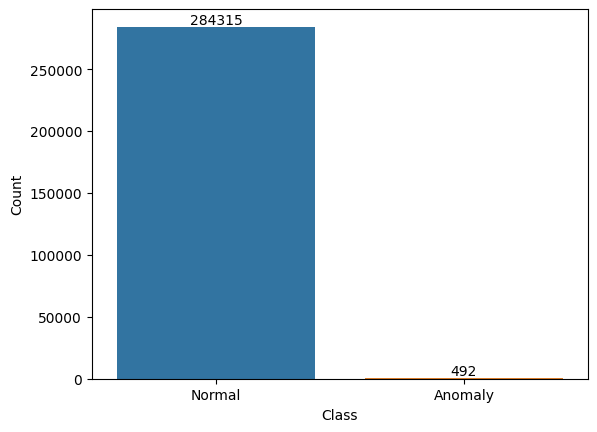

In [143]:
bar_plot_data = [['Normal', count0], ['Anomaly', count1]]

bar_plot_df = pd.DataFrame(bar_plot_data, columns=['Class', 'Count'])
ax = sns.barplot(x='Class', y='Count',
                 data=bar_plot_df)
ax.bar_label(ax.containers[0], fontsize=10);

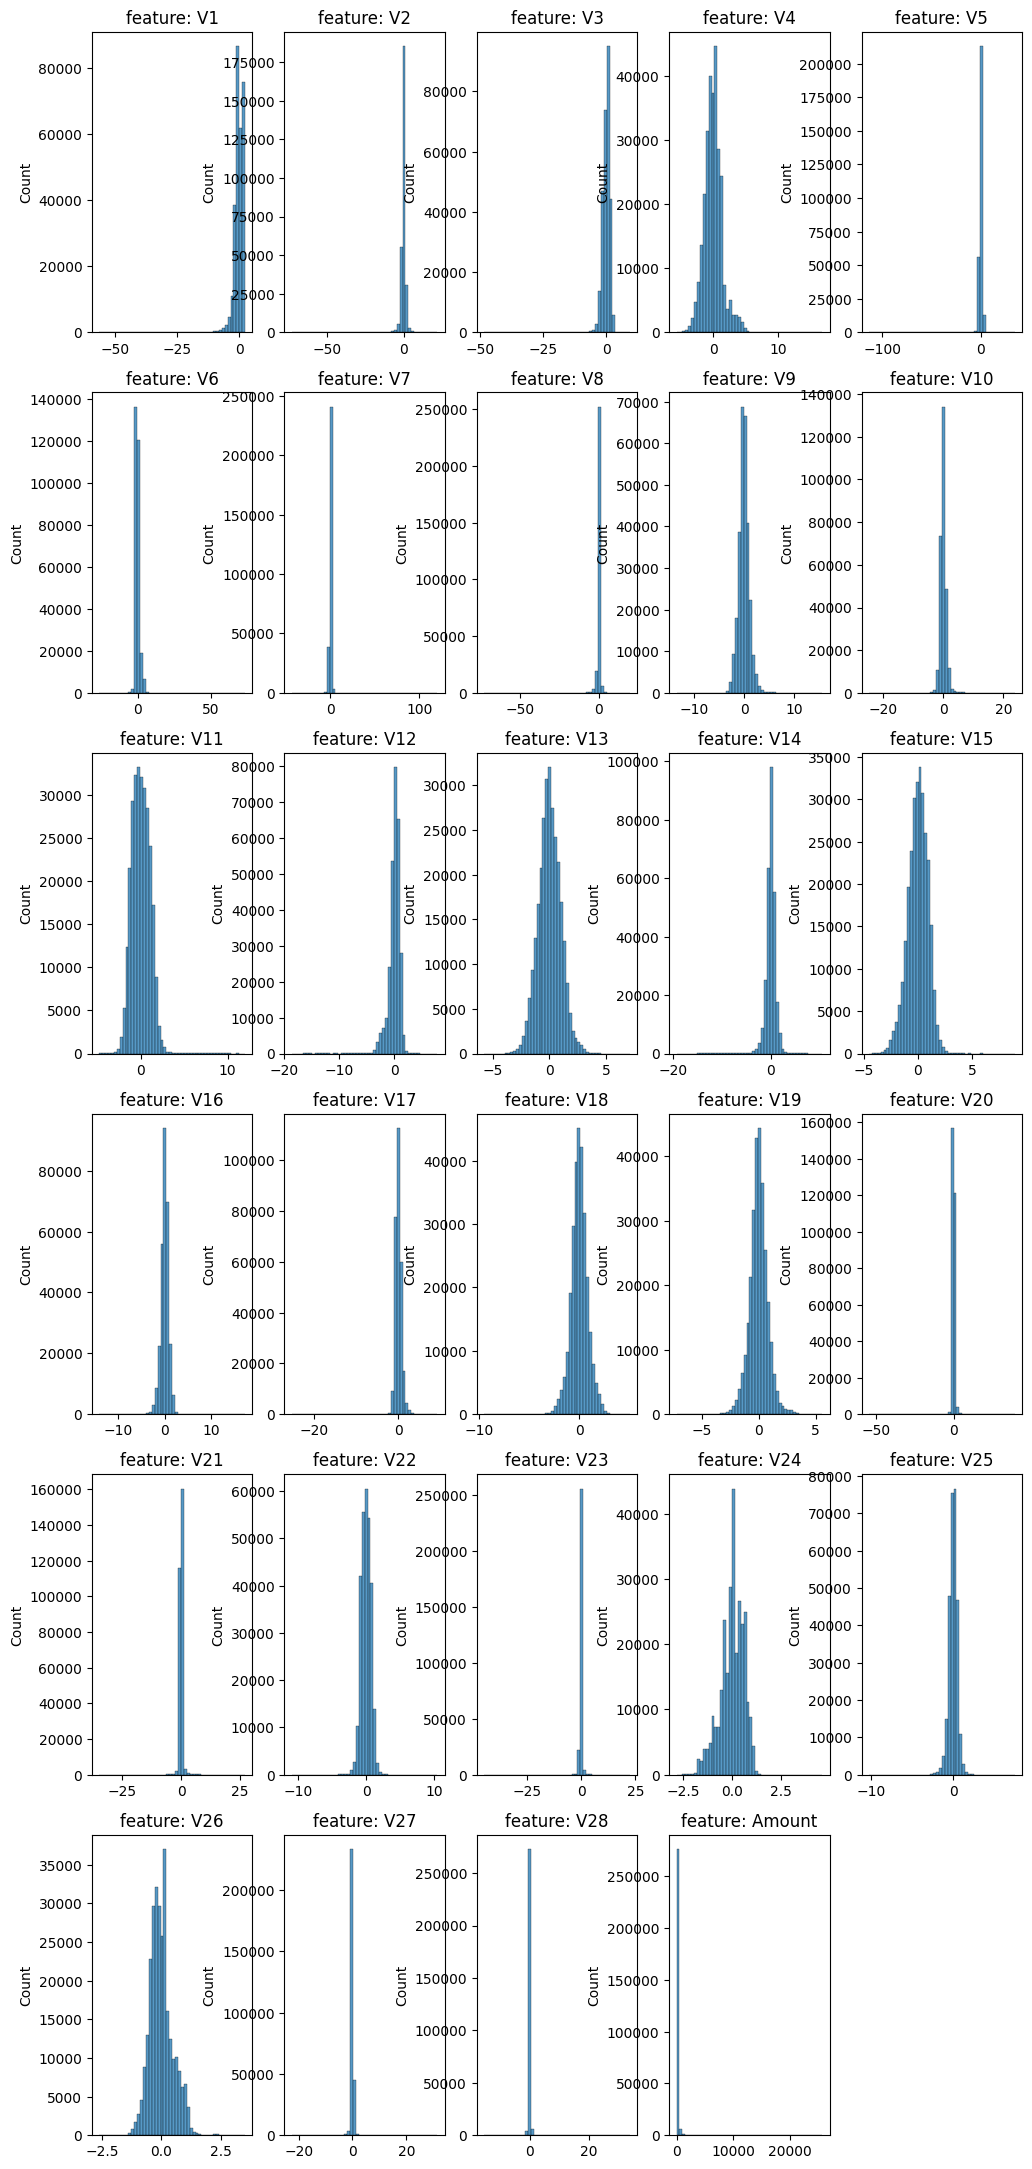

In [144]:
v_features = df.iloc[:,1:30].columns

plt.figure(figsize=(12,8*4))
gs = gridspec.GridSpec(7, 5)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.histplot(df[cn], bins=50)
    #sns.histplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
plt.show()

In [145]:
total_rows = 284807
## make normal table
normal_df = df[df.Class == 0]
normal_df.head(10)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
6  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055  0.750137   
7 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
8  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592  0.373205   
9  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050 -0.069733   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  
5  0.105915  0.253844  0.081080    3.67      0  
6 -0.257237  0.034507  0.005168    4.99      0  
7 -0.051634 -1.206921 -1.085339   40.80      0  
8 -0.384157  0.011747  0.142404   93.20      0  
9  0.094199  0.246219  0.083076    3.68      0  

[10 rows x 31 columns]

In [146]:
# make anomalous table
anomaly_df = df[df.Class == 1]
anomaly_df.head(10)

Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
6331  7526.0  0.008430  4.137837 -6.240697  6.675732  0.768307 -3.353060   
6334  7535.0  0.026779  4.132464 -6.560600  6.348557  1.329666 -2.513479   
6336  7543.0  0.329594  3.712889 -5.775935  6.078266  1.667359 -2.420168   
6338  7551.0  0.316459  3.809076 -5.615159  6.047445  1.554026 -2.651353   
6427  7610.0  0.725646  2.300894 -5.329976  4.007683 -1.730411 -1.732193   

            V7        V8        V9  ...       V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805   
6331 -1.631735  0.154612 -2.795892  ...  0.364514 -0.608057 -0.539528   
6334 -1.689102  0.303253 -3.139409  ...  0.370509 -0.576752 -0.669605   
6336 -0.812891  0.133080 -2.214311  ...  0.156617 -0.652450 -0.551572   
6338 -0.746579  0.055586 -2.678679  ...  0.208828 -0.511747 -0.583813   
6427 -3.968593  1.063728 -0.486097  ...  0.589669  0.109541  0.601045   

           V24       V25       V26       V27       V28  Amount  Class  
541   0.320198  0.044519  0.177840  0.261145 -0.143276    0.00      1  
623  -0.293803  0.279798 -0.145362 -0.252773  0.035764  529.00      1  
4920 -0.087330 -0.156114 -0.542628  0.039566 -0.153029  239.93      1  
6108 -0.053502  0.252405 -0.657488 -0.827136  0.849573   59.00      1  
6329 -1.632653  1.488901  0.566797 -0.010016  0.146793    1.00      1  
6331  0.128940  1.488481  0.507963  0.735822  0.513574    1.00      1  
6334 -0.759908  1.605056  0.540675  0.737040  0.496699    1.00      1  
6336 -0.716522  1.415717  0.555265  0.530507  0.404474    1.00      1  
6338 -0.219845  1.474753  0.491192  0.518868  0.402528    1.00      1  
6427 -0.364700 -1.843078  0.351909  0.594550  0.099372    1.00      1  

[10 rows x 31 columns]

In [147]:
# to make training set out normal table, by selecting 170885 of the examples from it
# from sklearn.utils import shuffle
normal_df = shuffle(normal_df)
normal_df_selected = normal_df[:170885]
normal_df_unselected = normal_df[170885:]

In [148]:
# join the unselected rows from normal table and the anomalous table and shuffle it again
joined_df = pd.concat([normal_df_unselected, anomaly_df])
shuffle(joined_df)
#joined_df.describe()

Time        V1        V2        V3        V4        V5        V6  \
101859   67964.0 -1.021273 -0.607589  1.361293 -0.677895  1.139880  0.556699   
13570    24053.0  1.153460  0.363267  1.114903  2.947172 -0.234818  0.471409   
178230  123533.0  1.767200 -0.274127 -2.238664  0.541759  0.541463 -0.850845   
97319    66163.0  1.116037 -0.051536  1.003635  0.531666 -0.710955 -0.057697   
238411  149657.0  1.898508 -0.824000 -0.546632  0.756944 -0.908286 -0.492584   
...          ...       ...       ...       ...       ...       ...       ...   
177458  123185.0  1.894618  0.655751 -2.749106  1.629824  0.933750 -1.237379   
77382    57024.0 -1.057052  1.687336  1.922090  2.969681 -0.485255  0.256566   
142465   84733.0 -0.889111  0.339179  2.722091 -1.023126 -0.750493 -0.107379   
83295    59777.0  0.917693 -0.895127  0.822533  0.199605 -1.233435  0.013940   
193581  130198.0  2.065658 -0.062622 -1.326895  0.368555 -0.077040 -1.304516   

              V7        V8        V9  ...       V21       V22       V23  \
101859 -0.436062  0.484084 -1.100056  ... -0.489061 -1.130514 -0.016340   
13570  -0.368545  0.029053  1.423075  ... -0.307691 -0.354112 -0.118170   
178230  0.593819 -0.361699  0.291907  ... -0.177902 -0.751457  0.067633   
97319  -0.517940  0.211435  0.120859  ...  0.007345  0.008435  0.132471   
238411 -0.507861 -0.158309 -0.300917  ... -0.256750 -0.282759  0.186116   
...          ...       ...       ...  ...       ...       ...       ...   
177458  0.400112 -0.178490 -0.008461  ...  0.105359  0.294914 -0.146124   
77382   0.218398  0.488713 -1.274028  ... -0.217347 -0.509030 -0.053476   
142465  0.248154  0.230846  0.051431  ...  0.026715  0.079338 -0.140021   
83295  -0.683265  0.222568  0.851650  ...  0.176062  0.232053 -0.195533   
193581  0.189258 -0.335552  0.715809  ...  0.241461  0.834619  0.016680   

             V24       V25       V26       V27       V28  Amount  Class  
101859 -1.455533 -0.063629 -0.630007  0.124291  0.122085   10.00      0  
13570  -0.150129  0.626517  0.052380  0.001146  0.014677   11.38      0  
178230  0.406325 -0.115301  0.288301 -0.100186 -0.002725  173.80      0  
97319   0.227737  0.024551  0.213397  0.005037  0.015365    9.99      0  
238411 -0.101503 -0.206794 -0.677228  0.055463 -0.014653   98.00      0  
...          ...       ...       ...       ...       ...     ...    ...  
177458 -0.663463  0.286509 -0.426283  0.027813  0.021243   49.63      0  
77382   0.387866  0.182151  0.112780  0.100351  0.075802   30.42      0  
142465  0.607179  0.097680  0.873310 -0.033326  0.052898   49.95      0  
83295   0.067065  0.127949  1.100339 -0.076149  0.024602  155.00      0  
193581  0.002316  0.226471 -0.102786 -0.021511 -0.061008    1.00      0  

[113922 rows x 31 columns]

In [149]:
# make train set, and keep rest data for validation and test set
X_train_df = normal_df_selected.iloc[:, 0:30]
y_train_df = normal_df_selected.iloc[:, 30]
X_rest_df = joined_df.iloc[:, 0:30]
y_rest_df = joined_df.iloc[:, 30]
X_rest_df.describe()

Time             V1             V2             V3  \
count  113922.000000  113922.000000  113922.000000  113922.000000   
mean    94856.848440      -0.015353       0.013014      -0.019973   
std     47516.388559       2.005516       1.695389       1.605010   
min         0.000000     -40.470142     -63.344698     -48.325589   
25%     54190.000000      -0.925329      -0.593997      -0.898454   
50%     84853.500000       0.009674       0.072798       0.177906   
75%    139352.500000       1.313308       0.811678       1.022131   
max    172792.000000       2.451888      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  113922.000000  113922.000000  113922.000000  113922.000000   
mean        0.013510      -0.009320      -0.002594      -0.012957   
std         1.441643       1.452186       1.352293       1.363393   
min        -5.683171    -113.743307     -23.496714     -43.557242   
25%        -0.841852      -0.695203      -0.770175      -0.557302   
50%        -0.017936      -0.055524      -0.273609       0.040465   
75%         0.748392       0.611997       0.398093       0.571830   
max        16.875344      34.099309      73.301626     120.589494   

                  V8             V9  ...            V20            V21  \
count  113922.000000  113922.000000  ...  113922.000000  113922.000000   
mean        0.001356      -0.010149  ...       0.001952       0.004171   
std         1.244754       1.109846  ...       0.789937       0.766832   
min       -73.216718     -13.434066  ...     -54.497720     -34.830382   
25%        -0.208842      -0.648184  ...      -0.211317      -0.228511   
50%         0.023639      -0.054806  ...      -0.062974      -0.028621   
75%         0.328369       0.587705  ...       0.133632       0.186958   
max        20.007208      15.594995  ...      39.420904      27.202839   

                 V22            V23            V24            V25  \
count  113922.000000  113922.000000  113922.000000  113922.000000   
mean       -0.001636       0.001674      -0.000426       0.000241   
std         0.730195       0.624864       0.606422       0.524297   
min       -10.933144     -27.215436      -2.824849      -7.081325   
25%        -0.542280      -0.161232      -0.353850      -0.318146   
50%         0.007450      -0.011161       0.040881       0.017616   
75%         0.524299       0.147579       0.438432       0.352091   
max        10.503090      20.803344       4.584549       7.519589   

                 V26            V27            V28         Amount  
count  113922.000000  113922.000000  113922.000000  113922.000000  
mean       -0.000709       0.002716       0.000261      88.926902  
std         0.481027       0.414160       0.319626     265.617244  
min        -2.604551     -22.565679     -15.430084       0.000000  
25%        -0.326724      -0.070934      -0.052949       5.500000  
50%        -0.052100       0.001783       0.011295      21.965000  
75%         0.241326       0.092974       0.079209      76.830000  
max         3.463246      31.612198      22.620072   25691.160000  

[8 rows x 30 columns]

In [150]:
# make equally sized val and test set with equal number of anomaly
X_train = X_train_df.values
y_train = y_train_df.values
X_rest = X_rest_df.values
y_rest = y_rest_df.values
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5,stratify=y_rest, random_state=42)

In [151]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [152]:
def estimate_gaussian(X):
    """ This function calculates mean and variance of all features
    in the dataset.
    Arguments:
        X (ndarray): (m, n) Data matrix
        Returns:
        mu (ndarray): (n,) Mean of all features
        var (ndarray): (n,) Variance of all features
    """

    m, n = X.shape
    mu = 1 / m * np.sum(X, axis = 0)
    var = 1 / m * np.sum((X - mu) ** 2, axis = 0)
    return mu, var

In [153]:
def multivariate_gaussian(X, mu, var):
    """
    Computes the probability density function of the examples X under the multivariate gaussian
    distribution with parameters mu and var.
    If var is a matrix, it is treated as the covariance matrix.
    If var is a vector, it is treated as the var values of the variances in each dimension (a diagonal
    covariance matrix
    """
    d = len(mu) #number of dimensions of feature matrix. (28 for V1-V28 plus 1 for amount = 29)

    if var.ndim == 1:
        var = np.diag(var)

    X = X - mu
    p = (2* np.pi)**(-d/2) * np.linalg.det(var)**(-0.5) * \
        np.exp(-0.5 * np.sum(np.matmul(X, np.linalg.pinv(var)) * X, axis=1))

    return p

In [154]:
# Estimate mean and variance of each feature
mu, var = estimate_gaussian(X_train)
print("Mean of each feature:", mu)
print("Variance of each feature:", var)

Mean of each feature: [ 9.47852007e+04  1.02351007e-02 -8.67600896e-03  1.33154980e-02
 -9.00627188e-03  6.21347992e-03  1.72953489e-03  8.63819861e-03
 -9.04080736e-04  6.76596287e-03  9.48403244e-03 -4.38802760e-03
  9.96385028e-03  1.02488958e-03  1.16420960e-02  1.62009637e-03
  8.58959866e-03  1.13515759e-02  4.16264107e-03 -1.70994829e-03
 -1.30119776e-03 -2.78053849e-03  1.09058455e-03 -1.11593637e-03
  2.83865304e-04 -1.60945100e-04  4.72791823e-04 -1.81046171e-03
 -1.74248715e-04  8.79647684e+01]
Variance of each feature: [2.25333321e+09 3.71249343e+00 2.62828469e+00 2.11390399e+00
 1.95538153e+00 1.76914581e+00 1.73910591e+00 1.31125770e+00
 1.34452265e+00 1.19036730e+00 1.08694522e+00 1.00483037e+00
 8.99358742e-01 9.90302847e-01 8.07303468e-01 8.37115985e-01
 7.13444237e-01 5.61952199e-01 6.79949970e-01 6.61509264e-01
 5.74537789e-01 5.07169413e-01 5.22278203e-01 3.89611312e-01
 3.66182117e-01 2.69626538e-01 2.33312726e-01 1.57171390e-01
 1.13484372e-01 5.72315071e+04]


In [155]:
def select_threshold(y_val, p_val, divisor):
    """
    Finds the best threshold, epsilon, to use for selecting outliers by using results from a validation set (p_val)
    and the ground truth (y_val).
    Arguments:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set
    Returns:
        epsilon (float): Threshold chosen
        F1 (float):      F1 score by choosing epsilon as threshold
    """
    epsilon_best = 0
    F1_best = 0
    F1 = 0
    step_size = (max(p_val) - min(p_val)) / divisor

    for epsilon in np.arange(min(p_val), max(p_val), step_size):

        # if PDF at each example point(val example point) is less than threshold,
        # then return TRUE, ie. 1 ie. ANOMALY (anomaly has low chance of occuring, low pdf value)
        predictions = (p_val < epsilon)

        tp = np.sum((predictions == 1) & (y_val == 1)) # True positive
        fn = np.sum((predictions == 0) & (y_val == 1)) # False negative
        fp = sum((predictions == 1) & (y_val == 0)) # False positive

        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        F1 = 2 * precision * recall / (precision + recall)

        # replace if better F1 score found
        if F1 > F1_best:
            F1_best = F1
            epsilon_best = epsilon

    # Calculate confusion matrix for the best threshold
    best_threshold_predictions = (p_val < epsilon_best)
    cm = confusion_matrix(y_val, best_threshold_predictions)

    # Display the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate and print precision, recall, accuracy, and F1 score
    precision = precision_score(y_val, best_threshold_predictions)
    recall = recall_score(y_val, best_threshold_predictions)
    accuracy = accuracy_score(y_val, best_threshold_predictions)
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'F1 Score: {F1_best:.2f}')

    return epsilon_best, F1_best

<ipython-input-155-f5dfd70c7264>:27: RuntimeWarning:

invalid value encountered in long_scalars



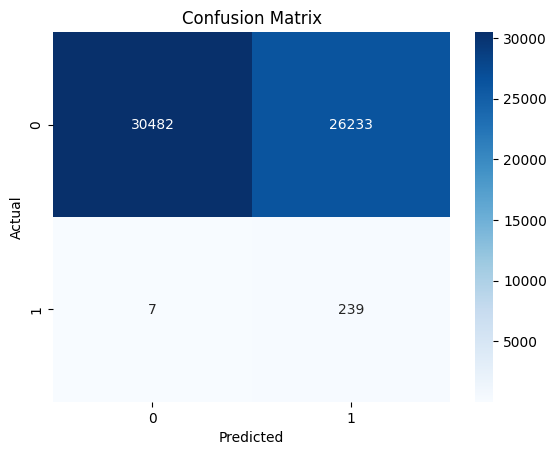

Precision: 0.01
Recall: 0.97
Accuracy: 0.54
F1 Score: 0.02


In [156]:
p_val = multivariate_gaussian(X_val, mu, var)
epsilon, F1 = select_threshold(y_val, p_val, 2000)


Getting the best output for high Recall values, i.e tp/(tp+fn)

In [157]:
print('Best epsilon found using cross-validation: %e'% epsilon)
print('Best F1 on Cross Validation Set:  %f'% F1)
print('# Anomalies found: %d'% sum(p_val < epsilon))
print('# Anomalies present: %d' % sum(y_val))


Best epsilon found using cross-validation: 1.321334e-22
Best F1 on Cross Validation Set:  0.017891
# Anomalies found: 26472
# Anomalies present: 246


# **To low F1 score**
  Attempt to improve:

    ->reduce step size
    ->use other method.